### Part 2: Programming Problems

#### Problem 1: Bell Curve Fitting
##### (1) Import dataset1.csv

Import the file `dataset1.csv` (100 rows, 2 columns) using `np.loadtxt` with `skiprows=2` and `delimiter=","`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Import dataset1.csv
data1 = np.loadtxt('dataset1.csv', skiprows=2, delimiter=",")
# First column: z, Second column: y
z_data = data1[:, 0]
y_data = data1[:, 1]
N = data1.shape[0]
print("Dataset1 shape:", data1.shape)

Dataset1 shape: (100, 2)


##### (2) Plot the Point Cloud

Plot the data points with the first column on the x-axis and the second column on the y-axis.

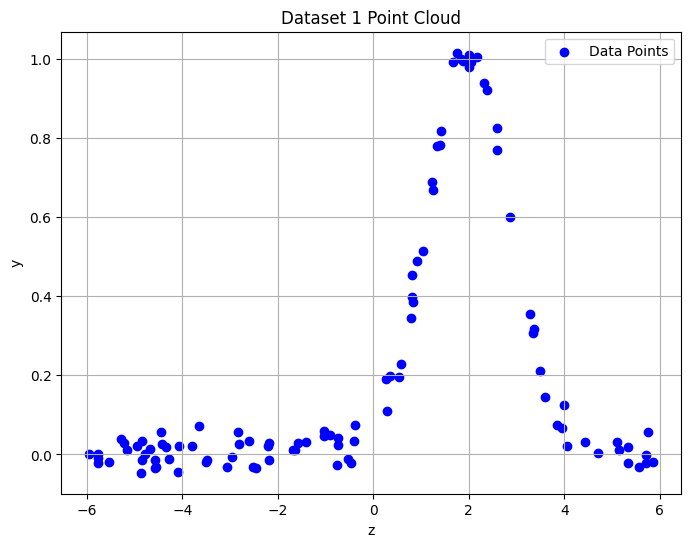

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(z_data, y_data, color='blue', label='Data Points')
plt.xlabel('z')
plt.ylabel('y')
plt.title('Dataset 1 Point Cloud')
plt.legend()
plt.grid(True)
plt.show()

##### (3) Define Model and Objective Function

Define the bell curve model:
$$
m(z;x) = \exp\Bigl(-\frac{(z - x_1)^2}{x_2}\Bigr)
$$
and the mean squared error objective:
$$
f(x) = \frac{1}{N} \sum_{i=1}^{N} \Bigl(m(z_i;x) - y_i\Bigr)^2.
$$

Evaluate $ f(x) $ at $ x = (1,0.5) $ and $ x = (0.5,1) $.

In [4]:
def bell_model(z, x):
    # x[0]: center, x[1]: width parameter
    return np.exp(-((z - x[0])**2) / x[1])

def objective(x, z, y):
    m = bell_model(z, x)
    return np.mean((m - y)**2)

# Evaluate objective at two sample parameter values:
print("f([1, 0.5]) =", objective([1, 0.5], z_data, y_data))
print("f([0.5, 1]) =", objective([0.5, 1], z_data, y_data))

f([1, 0.5]) = 0.11204289613814822
f([0.5, 1]) = 0.15009253657239355


##### (4) Show the Gradient of f

We want to show that the gradient is given by:
$$
\nabla f(x) = \frac{2}{N}\sum_{i=1}^{N} \Bigl(m(z_i;x)-y_i\Bigr)
\begin{pmatrix}
-\frac{\partial m(z_i;x)}{\partial x_1} \\
-\frac{\partial m(z_i;x)}{\partial x_2}
\end{pmatrix},
$$
with
$$
\frac{\partial m(z;x)}{\partial x_1} = m(z;x)\cdot \frac{2(z-x_1)}{x_2},\quad
\frac{\partial m(z;x)}{\partial x_2} = m(z;x)\cdot \frac{(z-x_1)^2}{x_2^2}.
$$

##### (5) Implement the Gradient Function

Write a function that computes $ \nabla f(x) $ for any $ x $ using the formulas above.
Evaluate the gradient at $ x = (1,0.5) $ and $ x = (0.5,1) $.

In [5]:
def grad_objective(x, z, y):
    m = bell_model(z, x)
    error = m - y
    # Compute derivatives using the chain rule:
    dm_dx1 = m * (2 * (z - x[0]) / x[1])
    dm_dx2 = m * ((z - x[0])**2 / (x[1]**2))
    # Gradient (note the negative sign from differentiating the exponent):
    grad_x1 = (2/N) * np.sum(error * (-dm_dx1))
    grad_x2 = (2/N) * np.sum(error * (-dm_dx2))
    return np.array([grad_x1, grad_x2])

# Evaluate the gradient at given points:
print("grad f([1, 0.5]) =", grad_objective([1, 0.5], z_data, y_data))
print("grad f([0.5, 1]) =", grad_objective([0.5, 1], z_data, y_data))

grad f([1, 0.5]) = [0.15222549 0.0578975 ]
grad f([0.5, 1]) = [0.09240185 0.02646519]


##### (6) Implement Gradient Descent

A function that implements Gradient Descent. At each iteration, it prints:
- $ x^{(k)} $
- $ f(x^{(k)}) $
- $ \|\nabla f(x^{(k)})\| $

The function should return a list of iterates.

In [6]:
def gradient_descent_bell(f, grad_f, x_start, alpha, max_iter=1000, tol=1e-6, verbose=True):
    x_current = np.array(x_start, dtype=float)
    iterates = [x_current.copy()]
    for k in range(max_iter):
        grad = grad_f(x_current, z_data, y_data)
        f_val = f(x_current, z_data, y_data)
        if verbose:
            print(f"Iteration {k}: x = {x_current}, f(x) = {f_val:.6e}, ||grad|| = {np.linalg.norm(grad):.6e}")
        if np.linalg.norm(grad) < tol:
            break
        x_current = x_current - alpha * grad
        iterates.append(x_current.copy())
    return iterates

##### (7) Test Gradient Descent

Test the algorithm for step sizes $ \alpha \in \{0.1, 1, 10, 100\} $ starting from
$ x^{(0)} = (2,5) $. Report the final parameters.

In [7]:
initial_x = [2, 5]
for alpha in [0.1, 1, 10, 100]:
    print(f"\nTesting GD with step size alpha = {alpha}")
    iters_bell = gradient_descent_bell(objective, grad_objective, initial_x, alpha, verbose=True)
    print("Final x:", iters_bell[-1])


Testing GD with step size alpha = 0.1
Iteration 0: x = [2. 5.], f(x) = 4.037644e-02, ||grad|| = 1.786355e-02
Iteration 1: x = [1.99884106 5.00135938], f(x) = 4.040840e-02, ||grad|| = 1.792805e-02
Iteration 2: x = [1.99767228 5.00271883], f(x) = 4.044060e-02, ||grad|| = 1.799334e-02
Iteration 3: x = [1.99649358 5.00407834], f(x) = 4.047304e-02, ||grad|| = 1.805942e-02
Iteration 4: x = [1.9953049  5.00543792], f(x) = 4.050571e-02, ||grad|| = 1.812630e-02
Iteration 5: x = [1.99410615 5.00679757], f(x) = 4.053863e-02, ||grad|| = 1.819398e-02
Iteration 6: x = [1.99289726 5.00815727], f(x) = 4.057180e-02, ||grad|| = 1.826248e-02
Iteration 7: x = [1.99167815 5.00951703], f(x) = 4.060521e-02, ||grad|| = 1.833180e-02
Iteration 8: x = [1.99044875 5.01087686], f(x) = 4.063888e-02, ||grad|| = 1.840195e-02
Iteration 9: x = [1.98920898 5.01223674], f(x) = 4.067281e-02, ||grad|| = 1.847292e-02
Iteration 10: x = [1.98795875 5.01359668], f(x) = 4.070700e-02, ||grad|| = 1.854474e-02
Iteration 11: x = [

##### (8) Plot the Fitted Bell Curve

Plot the bell curve with the optimal parameters (from GD) on top of the Dataset1 point cloud.

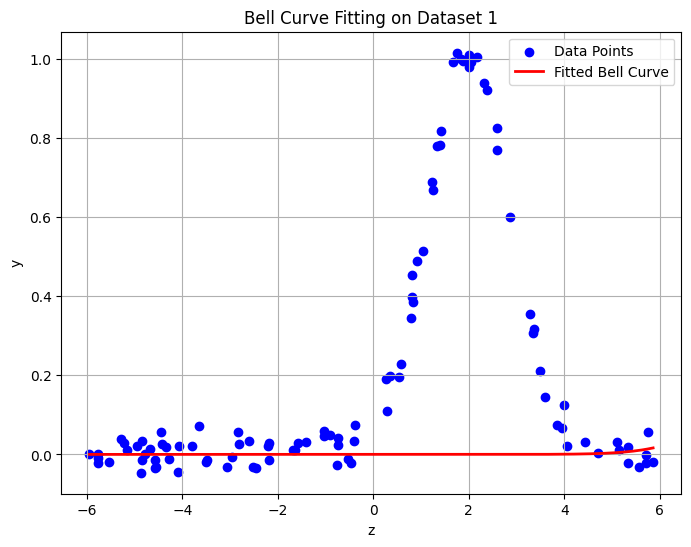

In [8]:
optimal_x = iters_bell[-1]
z_fit = np.linspace(np.min(z_data), np.max(z_data), 200)
m_fit = bell_model(z_fit, optimal_x)

plt.figure(figsize=(8, 6))
plt.scatter(z_data, y_data, color='blue', label='Data Points')
plt.plot(z_fit, m_fit, 'r-', linewidth=2, label='Fitted Bell Curve')
plt.xlabel('z')
plt.ylabel('y')
plt.title('Bell Curve Fitting on Dataset 1')
plt.legend()
plt.grid(True)
plt.show()

##### (9) Import dataset2.csv

Import `dataset2.csv` into a NumPy array.

In [10]:
data2 = np.loadtxt('dataset2.csv', skiprows=2, delimiter=",")
z_data2 = data2[:, 0]
y_data2 = data2[:, 1]
print("Dataset2 shape:", data2.shape)

Dataset2 shape: (100, 2)


##### (10) Plot Dataset2 Point Cloud

Plot the data points from `dataset2.csv` (first column on x-axis, second column on y-axis).

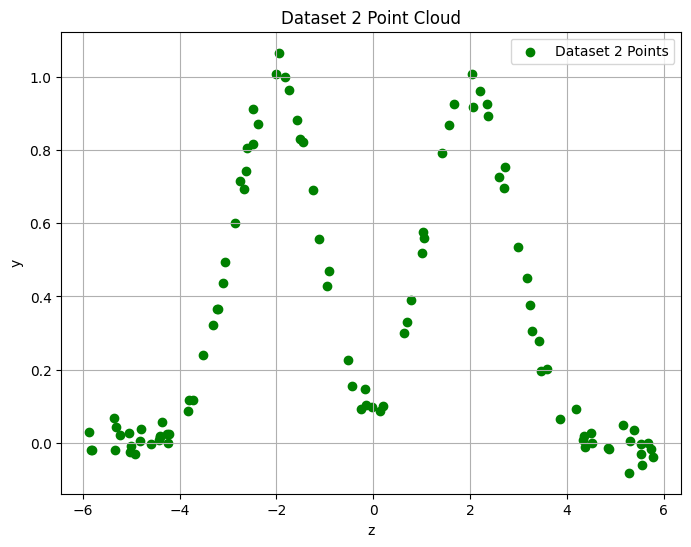

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(z_data2, y_data2, color='green', label='Dataset 2 Points')
plt.xlabel('z')
plt.ylabel('y')
plt.title('Dataset 2 Point Cloud')
plt.legend()
plt.grid(True)
plt.show()

##### (11) GD on Dataset2 from Different Initializations

Running Gradient Descent with step size $ \alpha = 10 $ until convergence from:
- $ x^{(0)} = (0,5) $
- $ x^{(0)} = (-1,1) $
- $ x^{(0)} = (1,1) $

For each initialization, we plot the fitted bell curve over the data points.


Starting GD on Dataset2 from x0 = [0, 5]
Iteration 0: x = [0. 5.], f(x) = 1.796497e-01, ||grad|| = 9.871903e-02
Iteration 1: x = [-0.98713497  5.01045024], f(x) = 2.691408e-01, ||grad|| = 7.657978e-02
Iteration 2: x = [-1.75292824  5.00781119], f(x) = 3.169780e-01, ||grad|| = 4.997205e-02
Iteration 3: x = [-2.24863791  5.07099711], f(x) = 3.395576e-01, ||grad|| = 4.236466e-02
Iteration 4: x = [-2.65502035  5.1907042 ], f(x) = 3.574714e-01, ||grad|| = 4.299213e-02
Iteration 5: x = [-3.05477892  5.34889831], f(x) = 3.764683e-01, ||grad|| = 4.513154e-02
Iteration 6: x = [-3.46906212  5.52793757], f(x) = 3.965342e-01, ||grad|| = 4.243059e-02
Iteration 7: x = [-3.85452523  5.70528948], f(x) = 4.124001e-01, ||grad|| = 3.080774e-02
Iteration 8: x = [-4.11945391  5.86252967], f(x) = 4.198912e-01, ||grad|| = 1.807089e-02
Iteration 9: x = [-4.23683084  5.99992816], f(x) = 4.225994e-01, ||grad|| = 1.312456e-02
Iteration 10: x = [-4.27049682  6.12678246], f(x) = 4.242388e-01, ||grad|| = 1.217534e

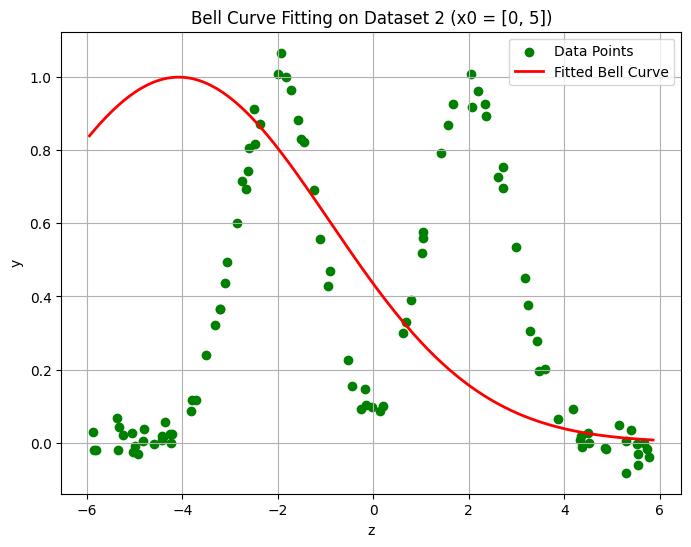


Starting GD on Dataset2 from x0 = [-1, 1]
Iteration 0: x = [-1.  1.], f(x) = 2.507378e-01, ||grad|| = 2.972778e-02
Iteration 1: x = [-0.88692615  1.27493346], f(x) = 2.558943e-01, ||grad|| = 2.235306e-02
Iteration 2: x = [-1.0623122   1.41351792], f(x) = 2.599563e-01, ||grad|| = 1.949332e-02
Iteration 3: x = [-1.10577423  1.60354422], f(x) = 2.636789e-01, ||grad|| = 1.945473e-02
Iteration 4: x = [-1.19795468  1.77486672], f(x) = 2.675504e-01, ||grad|| = 2.040253e-02
Iteration 5: x = [-1.29879634  1.95222872], f(x) = 2.718342e-01, ||grad|| = 2.161564e-02
Iteration 6: x = [-1.41421452  2.1349915 ], f(x) = 2.766460e-01, ||grad|| = 2.289210e-02
Iteration 7: x = [-1.54504284  2.32284455], f(x) = 2.820185e-01, ||grad|| = 2.399311e-02
Iteration 8: x = [-1.68975232  2.51422401], f(x) = 2.878715e-01, ||grad|| = 2.472367e-02
Iteration 9: x = [-1.84437858  2.70714032], f(x) = 2.940344e-01, ||grad|| = 2.508481e-02
Iteration 10: x = [-2.00418667  2.90049529], f(x) = 3.003589e-01, ||grad|| = 2.5361

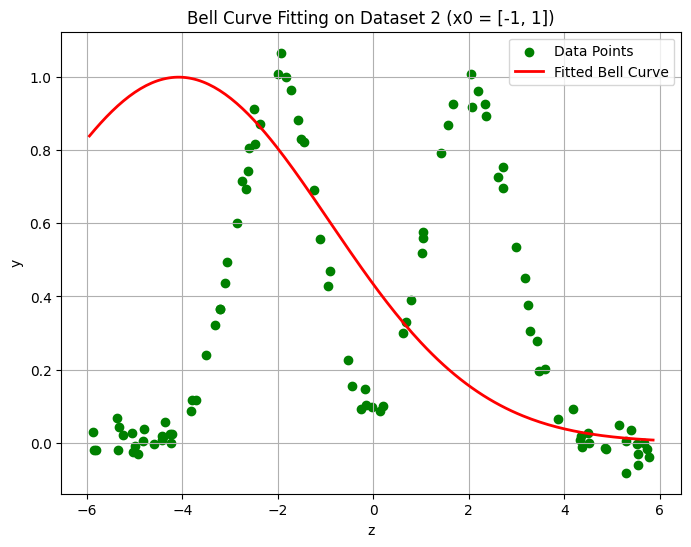


Starting GD on Dataset2 from x0 = [1, 1]
Iteration 0: x = [1. 1.], f(x) = 8.998820e-02, ||grad|| = 1.466819e-01
Iteration 1: x = [-0.4327908   0.68588677], f(x) = 2.267611e-01, ||grad|| = 8.680912e-02
Iteration 2: x = [-1.27639243  0.89062711], f(x) = 2.400608e-01, ||grad|| = 5.540176e-02
Iteration 3: x = [-0.98519452  1.36194362], f(x) = 2.585182e-01, ||grad|| = 1.904367e-02
Iteration 4: x = [-1.07991882  1.52715091], f(x) = 2.621353e-01, ||grad|| = 1.920233e-02
Iteration 5: x = [-1.15963596  1.70184526], f(x) = 2.658868e-01, ||grad|| = 1.996404e-02
Iteration 6: x = [-1.25492801  1.87727538], f(x) = 2.699805e-01, ||grad|| = 2.108704e-02
Iteration 7: x = [-1.36399823  2.05774707], f(x) = 2.745614e-01, ||grad|| = 2.236465e-02
Iteration 8: x = [-1.48840122  2.24360094], f(x) = 2.797020e-01, ||grad|| = 2.356836e-02
Iteration 9: x = [-1.62765006  2.43374961], f(x) = 2.853708e-01, ||grad|| = 2.446895e-02
Iteration 10: x = [-1.77871575  2.62623887], f(x) = 2.914267e-01, ||grad|| = 2.496631e

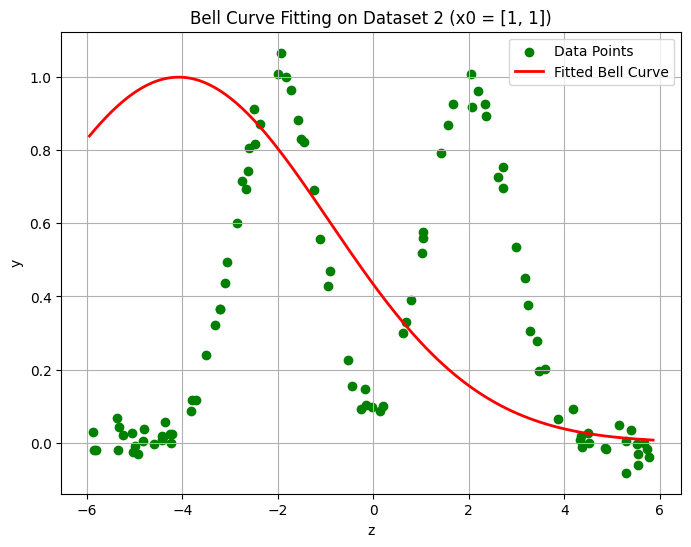

In [12]:
def grad_objective_d2(x, z, y):
    m = bell_model(z, x)
    error = m - y
    dm_dx1 = m * (2 * (z - x[0]) / x[1])
    dm_dx2 = m * ((z - x[0])**2 / (x[1]**2))
    grad_x1 = (2/len(z)) * np.sum(error * (-dm_dx1))
    grad_x2 = (2/len(z)) * np.sum(error * (-dm_dx2))
    return np.array([grad_x1, grad_x2])

initializations = [[0, 5], [-1, 1], [1, 1]]
alpha_d2 = 10

for x0 in initializations:
    print(f"\nStarting GD on Dataset2 from x0 = {x0}")
    iters_d2 = gradient_descent_bell(objective, grad_objective_d2, x0, alpha_d2, verbose=True)
    final_x_d2 = iters_d2[-1]
    print("Final x:", final_x_d2)
    
    # Plot fitted bell curve for current initialization
    m_fit2 = bell_model(z_fit, final_x_d2)
    plt.figure(figsize=(8, 6))
    plt.scatter(z_data2, y_data2, color='green', label='Data Points')
    plt.plot(z_fit, m_fit2, 'r-', linewidth=2, label='Fitted Bell Curve')
    plt.xlabel('z')
    plt.ylabel('y')
    plt.title(f'Bell Curve Fitting on Dataset 2 (x0 = {x0})')
    plt.legend()
    plt.grid(True)
    plt.show()

##### (12) 3D Surface Plot of f(x)

Plot in 3D the surface of the objective function
$$
f(x) = \frac{1}{N}\sum_{i=1}^{N}(m(z_i;x)-y_i)^2
$$
for \( x \in [-10,10]\times[0.2,10] \) for both Dataset1 and Dataset2.

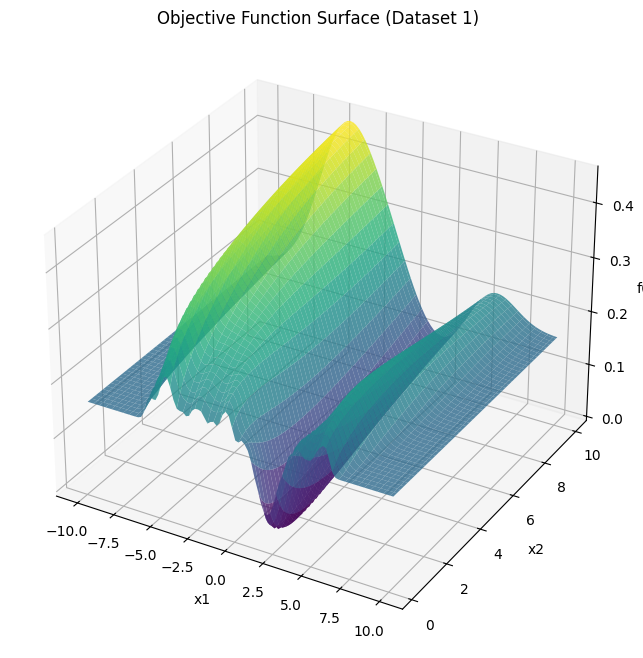

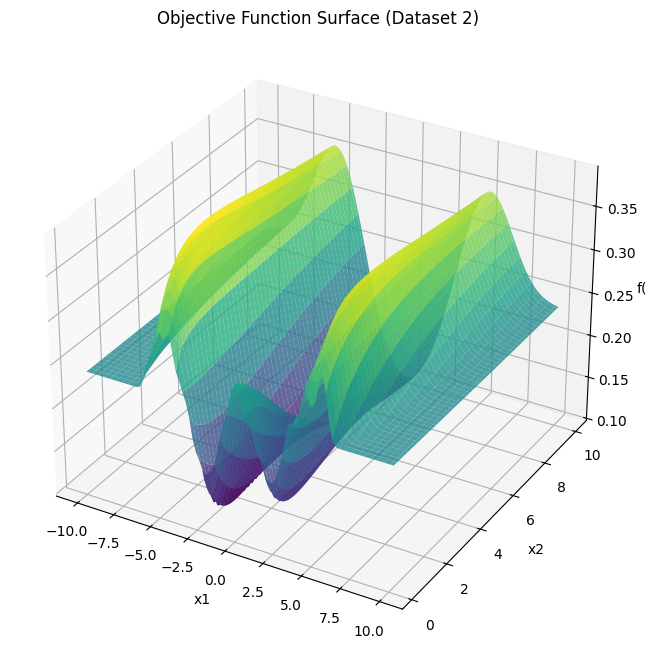

In [13]:
# Create grid for x = (x1, x2)
x1_vals = np.linspace(-10, 10, 100)
x2_vals = np.linspace(0.2, 10, 100)
X1_grid, X2_grid = np.meshgrid(x1_vals, x2_vals)

def f_surface(x1, x2, z, y):
    m = np.exp(-((z - x1)**2) / x2)
    return np.mean((m - y)**2)

# Surface for Dataset1
F1 = np.array([[f_surface(x1, x2, z_data, y_data) for x1 in x1_vals] for x2 in x2_vals])
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X1_grid, X2_grid, F1, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
ax.set_title('Objective Function Surface (Dataset 1)')
plt.show()

# Surface for Dataset2
F2 = np.array([[f_surface(x1, x2, z_data2, y_data2) for x1 in x1_vals] for x2 in x2_vals])
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X1_grid, X2_grid, F2, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
ax.set_title('Objective Function Surface (Dataset 2)')
plt.show()

# Problem 2: Newton’s Algorithm

We consider the function:
$$
f(x) = 100\,(x_2 - x_1^2)^2 + (x_1 - 1)^2.
$$

Our goal is to find its minimum using Newton’s Method and compare the results with those obtained by Gradient Descent. Both algorithms are initialized at 
$$
x^{(0)} = (2,2).
$$

We will report the final iterate and the number of iterations required for convergence.

In [14]:
# Define the function f(x) as per the assignment
def f_rosenbrock(x):
    x1, x2 = x[0], x[1]
    return 100*(x2 - x1**2)**2 + (x1 - 1)**2

# Define the gradient of f(x)
def grad_rosenbrock(x):
    x1, x2 = x[0], x[1]
    # Partial derivatives:
    # ∂f/∂x1 = -400*x1*(x2 - x1**2) + 2*(x1 - 1)
    # ∂f/∂x2 = 200*(x2 - x1**2)
    return np.array([ -400 * x1 * (x2 - x1**2) + 2*(x1 - 1),
                      200*(x2 - x1**2) ])

# Define the Hessian of f(x)
def hessian_rosenbrock(x):
    x1, x2 = x[0], x[1]
    d2f_dx1dx1 = -400*(x2 - 3*x1**2) + 2
    d2f_dx1dx2 = -400*x1
    d2f_dx2dx1 = -400*x1
    d2f_dx2dx2 = 200
    return np.array([[d2f_dx1dx1, d2f_dx1dx2],
                     [d2f_dx2dx1, d2f_dx2dx2]])

# Newton's Method implementation
def newton_method(f, grad_f, hessian_f, x_start, max_iter=100, tol=1e-6):
    x_current = np.array(x_start, dtype=float)
    iterates = [x_current.copy()]
    for k in range(max_iter):
        grad = grad_f(x_current)
        H = hessian_f(x_current)
        # Compute Newton step: d = -H^{-1} grad
        d = -np.linalg.solve(H, grad)
        if np.linalg.norm(grad) < tol:
            break
        x_current = x_current + d
        iterates.append(x_current.copy())
    return x_current, iterates

# Gradient Descent function (from Assignment 2)
def gradient_descent(f, grad_f, x_start, alpha, max_iter=1000, tol=1e-6):
    x_current = np.array(x_start, dtype=float)
    iterates = [x_current.copy()]
    for _ in range(max_iter):
        grad = grad_f(x_current)
        if np.linalg.norm(grad) < tol:
            break
        x_current = x_current - alpha * grad
        iterates.append(x_current.copy())
    return iterates

# Set the initial point as given: x(0) = (2,2)
x0 = np.array([2, 2])

# Run Newton's Method
x_newton, iters_newton = newton_method(f_rosenbrock, grad_rosenbrock, hessian_rosenbrock, x0)
print("Newton's method final x:", x_newton)
print("Newton's iterations:", len(iters_newton))

# Run Gradient Descent with step size α = 0.001
iters_gd = gradient_descent(f_rosenbrock, grad_rosenbrock, x0, alpha=0.001)
print("Gradient Descent final x:", iters_gd[-1])
print("Gradient Descent iterations:", len(iters_gd))

Newton's method final x: [1. 1.]
Newton's iterations: 6
Gradient Descent final x: [1.20924655 1.46301622]
Gradient Descent iterations: 1001
